In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\M RAJESH\Downloads\Customer_chun.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace = True)

In [5]:
df.shape

(7043, 20)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Remove rows with space in TotalCharges

In [11]:
df1 = df[df.TotalCharges != ' ']

In [12]:
df1.shape

(7032, 20)

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_5420\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

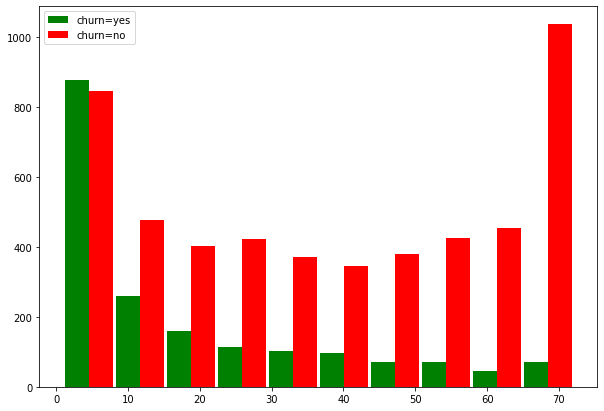

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.figure(figsize=(10,7))
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend()


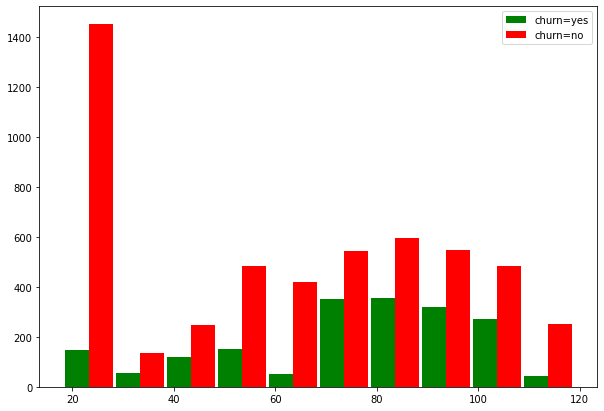

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(10,7))
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend()


Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [17]:
def unique_values_col (df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df[column].unique()}')
    

In [18]:
unique_values_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [19]:
df1.replace('No internet service' , 'No',inplace = True)
df1.replace('No phone service' , 'No',inplace = True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_5420\1389860495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No',inplace = True)
C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_5420\1389860495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No',inplace = True)


In [20]:
unique_values_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1 , 'No':0},inplace=True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_5420\3245476302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1 , 'No':0},inplace=True)


In [22]:
unique_values_col(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_5420\4002762901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)


In [24]:
df1['gender'].unique()

array([0, 1], dtype=int64)

One hot encoding for categorical columns

In [25]:
df2 = pd.get_dummies(data=df1 , columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2259,0,0,0,0,8,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
713,0,0,0,1,14,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1298,0,0,1,1,24,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
6727,0,1,1,0,13,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1046,0,0,0,0,52,1,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0
5239,1,0,1,1,68,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9af6e0730>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9af6e0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9af6e0460>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9af6f32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9af6f3580>],
 'means': []}

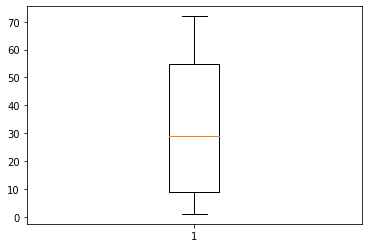

In [28]:
plt.boxplot(df2.tenure)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9af74c1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9af74c760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9af73feb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9af74cd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9af74cfd0>],
 'means': []}

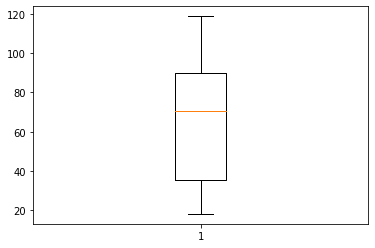

In [29]:
plt.boxplot(df2.MonthlyCharges)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9af7a2e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9af7b3430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9af7a2b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9af7b39d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9af7b3ca0>],
 'means': []}

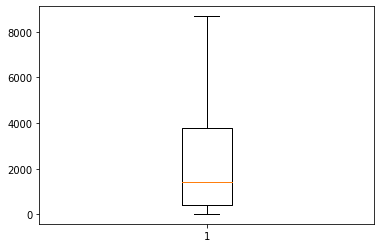

In [30]:
plt.boxplot(df2.TotalCharges)

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
for i in df2:
    print(f'{i} : {df2[i].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

Train test split

In [34]:
x= df2.drop('Churn',axis=1)
y=df2.Churn

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
len(x_train)

5625

In [37]:
len(x_test)

1407

In [38]:
x_train.shape

(5625, 26)

Build a model (ANN) in tensorflow/keras

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import losses
from sklearn.metrics import confusion_matrix , classification_report


In [87]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [48]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.5051 - accuracy: 0.7497
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4144 - accuracy: 0.8062
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8052
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4074 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4041 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8336
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8343
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3549 - accuracy: 0.8368
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8336
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8363
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3534 - accuracy: 0.8389
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8389
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8372
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.8379
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 

Mitigating Skewdness of Data

#Method 1: Undersampling

In [49]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
count_class_0 , count_class_1 = df2['Churn'].value_counts()
df2_class_0 = df2[df2['Churn']==0]
df2_class_1 = df2[df2['Churn']==1]

In [52]:
count_class_0 , count_class_1

(5163, 1869)

In [56]:
df_test_under  = pd.concat([df2_class_0.sample(count_class_1) , df2_class_1] , axis=0) 

In [58]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [69]:
X = df_test_under.drop('Churn' , axis=1)
Y = df_test_under.Churn 

In [70]:
X.shape

(3738, 26)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2 , random_state=15 , stratify=Y)

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6425 - accuracy: 0.6495
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7722
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8177
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8187
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8207
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8251
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8204
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8187
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8201
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8224
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8201
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8194
Epoch 93/100


Method2: Oversampling

In [90]:
df_class_1_over = df2_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df2_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())


Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [91]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [92]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [93]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5749 - accuracy: 0.7017
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4959 - accuracy: 0.7598
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7640
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.7683
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7699
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.7718
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.7754
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7759
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7789
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4632 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3770 - accuracy: 0.8334
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8337
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8334
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8335
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8351
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8338
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8350
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8349
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8357
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.79. Score for class 0 reduced to 0.84 from 0.77 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

Method3: SMOTE

In [95]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

MODEL 4 : ENSEMBLE 

In [107]:
# EXERCISE HAVE TO BE DONE 